# **赶 只 鸡** 

对没有错我们今天的任务就是赶鸡，恩对。

无聊的部分开始了，喜欢实战的，可以不要看接下来这部分，认真的部分！

本人才疏学浅，如有错误请指出我来修改，感谢大家的理解

# **概述**

在机器学习中，感知机（perceptron）是二分类的线性分类模型，属于监督学习算法。输入为实例的特征向量，输出为实例的类别（取+1和-1）。

感知机对应于输入空间中将实例划分为两类的分离超平面。感知机旨在求出该超平面，为求得超平面导入了基于误分类的损失函数，利用梯度下降法 对损失函数进行最优化（最优化）。

感知机的学习算法具有简单而易于实现的优点，分为原始形式和对偶形式。感知机预测是用学习得到的感知机模型对新的实例进行预测的，因此属于判别模型。

感知机由Rosenblatt于1957年提出的，是神经网络和支持向量机的基础。

# **定义**

假设输入空间(特征向量)为X=[x1,x2,x3,x......]，输出空间为Y = [1,-1]。

输入 = X

表示实例的特征向量，对应于输入空间的点；

输出 = Y

表示示例的类别。

由输入空间到输出空间的函数为

$f(x)=sign(w^Tx+b)$

称为感知机。其中，参数w叫做权值向量(weight)，b称为偏置(bias)。表示$w^T$和x的点积

$\mathbf{w}^{T} \mathbf{x} =w_1*x_1+w_2*x_2+w_3*x_3+...+w_n*x_n$ 
，$\mathbf{w} = [w_1, w_2,...,w_n]^{T}$
，$\mathbf{x} = [x_1, x_2,...,x_n]^{T}$

sign为符号函数，即

$sign(A)=\left\{\begin{matrix}+1，A \geq 0\\-1，A<0\end{matrix}\right.$

感知机算法就是要找到一个超平面将我们的数据分为两部分。

超平面就是维度比我们当前维度空间小一个维度的空间， 例如：我们当前的维度是二维的空间（由数据维度确定，x有多少列就有多大的维度），那么超平面就是一维
的，即一条直线。如下图

![](https://ai-studio-static-online.cdn.bcebos.com/823c9c1f75a64906ad4f796549f063a1417360f3e5e44466a3ac4a21f18408b0)

# **下面让我们一起动手实现最简单的感知机吧！**

In [ ]:
#引入必要的包
import paddle
print("本教程使用的paddle版本为：" + paddle.__version__)
import numpy as np
import matplotlib.pyplot as plt

本教程使用的paddle版本为：2.0.0


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


In [ ]:
np.random.seed(0)
num=100

#生成数据集x1,x2,y0/1
#随机生成100个x1
x1=np.random.normal(6,1,size=(num))
#随机生成100个x2
x2=np.random.normal(3,1,size=(num))
#生成100个y（全身不都是1哦）
y=np.ones(num)
#将生成好的点放入到一个分类中
class1=np.array([x1,x2,y])
class1.shape
#接下来生成第二类点，原理跟第一类一样
x1=np.random.normal(3,1,size=(num))
x2=np.random.normal(6,1,size=(num))
y=np.ones(num)*(-1)
class2=np.array([x1,x2,y])

In [ ]:
#看一下生成点的样子
print(class1.shape)
print(class2.shape)

(3, 100)
(3, 100)


# 这个形状不便于我们操作数据，我们来转置一下

In [ ]:
class1=class1.T
class2=class2.T
#再看一下生成点的样子
print(class1.shape)
print(class2.shape)

(100, 3)
(100, 3)


# 光看数据，也不知道是啥啊。来画图看一下

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


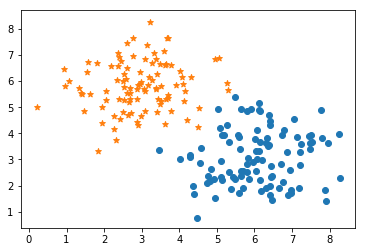

In [ ]:
plt.scatter(class1[:,0],class1[:,1])
plt.scatter(class2[:,0],class2[:,1],marker='*')

# 这下就清楚了，接下来就要画线了

In [ ]:
#将两类数据都放到一个变量里面
all_data = np.concatenate((class1,class2))
print(all_data)


[[ 7.76405235  4.8831507   1.        ]
 [ 6.40015721  1.65224094  1.        ]
 [ 6.97873798  1.729515    1.        ]
 [ 8.2408932   3.96939671  1.        ]
 [ 7.86755799  1.82687659  1.        ]
 [ 5.02272212  4.94362119  1.        ]
 [ 6.95008842  2.58638102  1.        ]
 [ 5.84864279  2.25254519  1.        ]
 [ 5.89678115  4.92294203  1.        ]
 [ 6.4105985   4.48051479  1.        ]
 [ 6.14404357  4.86755896  1.        ]
 [ 7.45427351  3.90604466  1.        ]
 [ 6.76103773  2.13877431  1.        ]
 [ 6.12167502  4.91006495  1.        ]
 [ 6.44386323  2.73199663  1.        ]
 [ 6.33367433  3.8024564   1.        ]
 [ 7.49407907  3.94725197  1.        ]
 [ 5.79484174  2.84498991  1.        ]
 [ 6.3130677   3.61407937  1.        ]
 [ 5.14590426  3.92220667  1.        ]
 [ 3.44701018  3.37642553  1.        ]
 [ 6.6536186   1.90059921  1.        ]
 [ 6.8644362   3.29823817  1.        ]
 [ 5.25783498  4.3263859   1.        ]
 [ 8.26975462  2.30543214  1.        ]
 [ 4.54563433  2.85036546

# 这也太整齐了，不行不行，这对应我们的感知机来说岂不是太简单了。咱得来点~~男的~~（难的）

In [ ]:
#将数据打乱
np.random.shuffle(all_data)
print(all_data)

[[ 6.76103773  2.13877431  1.        ]
 [ 2.49318365  6.00377089 -1.        ]
 [ 7.53277921  3.67229476  1.        ]
 [ 6.46566244  2.3563816   1.        ]
 [ 4.92924738  2.260437    1.        ]
 [ 8.2408932   3.96939671  1.        ]
 [ 6.6536186   1.90059921  1.        ]
 [ 3.39009332  5.75054142 -1.        ]
 [ 5.3039167   5.64656825 -1.        ]
 [ 6.44386323  2.73199663  1.        ]
 [ 2.69098703  5.55907737 -1.        ]
 [ 2.40368596  6.93184837 -1.        ]
 [ 4.07961859  6.15670386 -1.        ]
 [ 5.59821906  3.84436298  1.        ]
 [ 4.15233156  5.63530646 -1.        ]
 [ 2.37191244  6.56729028 -1.        ]
 [ 5.49034782  5.38314477  1.        ]
 [ 2.88389606  4.42937659 -1.        ]
 [ 5.42115034  2.31045022  1.        ]
 [ 3.39904635  6.28044171 -1.        ]
 [ 2.18663574  6.5785215  -1.        ]
 [ 5.36567791  1.85253135  1.        ]
 [ 6.42833187  2.33652171  1.        ]
 [ 2.53640403  6.27451636 -1.        ]
 [ 2.86711942  5.31216239 -1.        ]
 [ 4.2737174   3.08755124

**这就舒服多了**

In [ ]:
print(all_data.shape)
#截取出坐标数据
train_data_x=all_data[:150,:2]
#截取出标签数据
train_data_y=all_data[:150,-1].reshape(150,1)

print(train_data_x.shape)

print(train_data_y.shape)

(200, 3)
(150, 2)
(150, 1)


千万不要弄混了哦，现在Y不是Y轴而是一个标签。x不是单一的x输入量而是一个坐标

In [ ]:
#将数据转化为tensor形式
x_data = paddle.to_tensor(train_data_x.astype('float32'))
y_data = paddle.to_tensor(train_data_y.astype('float32'))

我们要完成的公式是：

$y=w1x1+w2x2+b$

注意：w1 w2 B 是学出来的

In [ ]:
#初始化一个感知“鸡”
#这个感知“鸡”的公式可以去看一下官方文档哦

linear = paddle.nn.Linear(in_features=2, out_features=1)
#初始化一个优化函数帮助我们训练感知“鸡”
mse_loss = paddle.nn.MSELoss()
sgd_optimizer = paddle.optimizer.SGD(learning_rate=0.001, parameters = linear.parameters())

# 开始训练！

In [ ]:
# 定义一下要训练多少回合，这只鸡看起来就不太聪明咱们多训练一会
total_epoch = 50000
#构建训练过程
for i in range(total_epoch):
    #将数据给到定义好的linear感知“鸡”中，对就是要 赶 只 鸡
    y_predict = linear(x_data)
    #获取loss
    loss = mse_loss(y_predict, y_data)
    #反向传播
    loss.backward()
    sgd_optimizer.step()
    sgd_optimizer.clear_grad()
    #获取感知“鸡”中的w1
    w1_after_opt = linear.weight.numpy()[0].item()
    #获取感知“鸡”中的w2
    w2_after_opt = linear.weight.numpy()[1].item()
    #获取感知“鸡”中的b
    b_after_opt = linear.bias.numpy().item()
    #每1000次输出一次数据
    if i%1000 == 0:
        print("epoch {} loss {}".format(i, loss.numpy()))
        print("w1 after optimize: {}".format(w1_after_opt))
        print("w2 after optimize: {}".format(w2_after_opt))
        print("b after optimize: {}".format(b_after_opt))
print("finished training， loss {}".format(loss.numpy()))

epoch 0 loss [64.646065]
w1 after optimize: 0.3556554615497589
w2 after optimize: 1.2206629514694214
b after optimize: -0.015229061245918274
epoch 1000 loss [0.16097412]
w1 after optimize: 0.3028927743434906
w2 after optimize: -0.26204362511634827
b after optimize: -0.18855762481689453
epoch 2000 loss [0.16097398]
w1 after optimize: 0.30295199155807495
w2 after optimize: -0.2620217800140381
b after optimize: -0.1889321208000183
epoch 3000 loss [0.16097383]
w1 after optimize: 0.3029892146587372
w2 after optimize: -0.26198193430900574
b after optimize: -0.18928521871566772
epoch 4000 loss [0.16097373]
w1 after optimize: 0.3030245900154114
w2 after optimize: -0.26194408535957336
b after optimize: -0.18962085247039795
epoch 5000 loss [0.16097362]
w1 after optimize: 0.3030581772327423
w2 after optimize: -0.2619081139564514
b after optimize: -0.18993957340717316
epoch 6000 loss [0.16097353]
w1 after optimize: 0.30309006571769714
w2 after optimize: -0.2618740200996399
b after optimize: -0.190

# 卧槽！你看见了吗？那个w1和w2还有b2在动！我们真的训练了赶只鸡


# 行了练的差不多了，还记得核心任务吗？让那只鸡去画线！

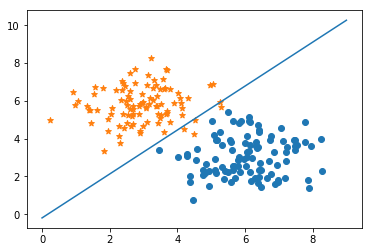

In [ ]:
plt.scatter(class1[:,0],class1[:,1])
plt.scatter(class2[:,0],class2[:,1],marker='*')
x=np.arange(10)
#画线的公式
y=-(w1_after_opt*x)/w2_after_opt+b_after_opt
plt.plot(x,y)